In [1]:
import numpy as np
import pandas as pd

# Load npz file
data = np.load("phase_tx1.0_U25.0-(1.0)_Mu40.0-(0.2).npz")
# This will show what arrays are inside
print(data.files)

# Load csv file
df = pd.read_csv("phase_tx1.0_U25.0-(1.0)_Mu40.0-(0.2).csv")
print(df.head())


['headers', 'data']
    tx    U   mu  rho0  rho1  rho2  rho3  phi0_sq  phi1_sq  phi2_sq  phi3_sq  \
0  1.0  0.0 -5.0   0.0   0.0   0.0   0.0      0.0      0.0      0.0      0.0   
1  1.0  0.0 -4.8   0.0   0.0   0.0   0.0      0.0      0.0      0.0      0.0   
2  1.0  0.0 -4.6   0.0   0.0   0.0   0.0      0.0      0.0      0.0      0.0   
3  1.0  0.0 -4.4   0.0   0.0   0.0   0.0      0.0      0.0      0.0      0.0   
4  1.0  0.0 -4.2   0.0   0.0   0.0   0.0      0.0      0.0      0.0      0.0   

    E0  iters  
0  0.0     30  
1  0.0     35  
2  0.0     44  
3  0.0     61  
4  0.0    109  


In [2]:
# Define threshold
threshold = 1e-6  

# Add phase column: 0 = Mott, 1 = Superfluid
df["Phase"] = (df[["phi0_sq","phi1_sq","phi2_sq","phi3_sq"]].sum(axis=1) > threshold).astype(int)

print(df[["U","mu","Phase"]].head())


     U   mu  Phase
0  0.0 -5.0      0
1  0.0 -4.8      0
2  0.0 -4.6      0
3  0.0 -4.4      0
4  0.0 -4.2      0


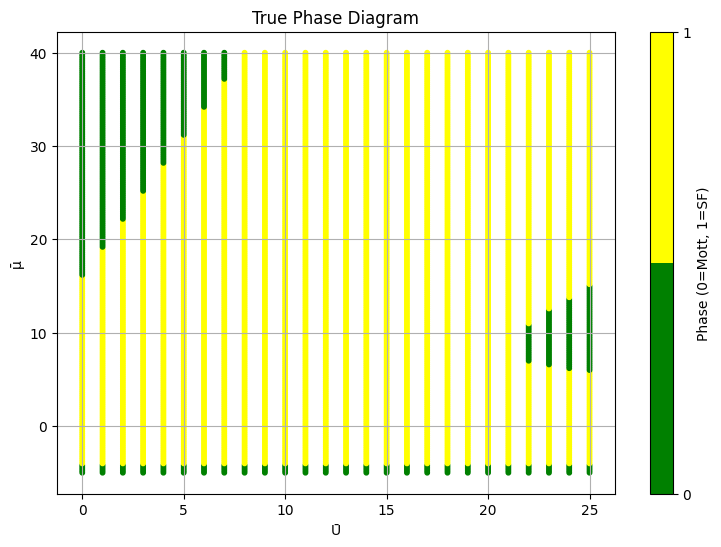

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.figure(figsize=(6,5))
# sc = plt.scatter(df["U"], df["mu"], c=df["Phase"], cmap="bwr", s=15)
# plt.colorbar(sc, label="Phase (0=Mott, 1=Superfluid)")
# plt.xlabel("U")
# plt.ylabel("μ")
# plt.title("Ground Truth Phase Diagram")
# plt.show()

# 2) Plot True Phase Diagram
plt.figure(figsize=(9,6))
plt.scatter(df["U"], df["mu"], c=df["Phase"], s=10, cmap=ListedColormap(['green','yellow']))
plt.colorbar(ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
# plt.clim(-0.5, 1.5)
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("True Phase Diagram")
plt.grid(True)
plt.show()

